In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction
Improvement in mental health and stress management is key to enhance job performance productivity and more importantly, to lighten the burden of mental and physical health conditons boosting well-being amongst adults.
This analysis is aimed to look into strategies workplaces has taken to address mental issues and its impact.

# 1. set up environment and load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
survey = pd.read_csv('/kaggle/input/mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv')

# 2. Investigate, data cleaning and processing
* Data has 1433 rows and 63 columns ( 1433 observations and 63 questions/attributes)
* rename columns

let's take a look at how our data is looking

In [3]:
survey.shape
survey.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


now lets rename columns

In [4]:
# look at column names
cols = list(survey.columns)
cols
# rename columns
columns_renamed = ['self_employ_cat', 'employee_count', 'tech_comp_cat', 'tech_role_cat', 'mh_coverage_cat',
                 'mh_coverage_aware_cat', 'mh_employer_discus_cat', 'employer_mhresource_cat','employee_anonymity_cat', 'medical_leave_cat', 
                  'mh_employer_discus_negimpact_cat','ph_employer_discus_negimpact_cat', 'mh_cowork_discus_cat', 'mh_directsup_discus_cat','mh_vs_ph_employer',
                  'mh_coworker_discus_conseq','mh_coverage_cat2', 'aware_online_mhresoure_cat', 'employer_diag&reveamh_toclient_cat','employer_revealmh_toclient_neg_conseq_cat',
                  'employer_diag&reveamh_tocowork_cat','employer_revealmh_tocowork_neg_conseq_cat','mh_prod_impact_cat','mh_prod_impact_percent','prev_employer_cat',
                  'prevemployer_mh_benefit_cat','mh_coverage_aware_prev_cat','mh_employer_discus_prev_cat','employer_mhresource_prev_cat','employee_anonymity_prev_cat',
                  'mh_employer_discus_negimpact_prev_cat','ph_employer_discus_negimpact_prev_cat','mh_cowork_discus_prev_cat','mh_directsup_discus_prev_cat','mh_vs_ph_employer_prev',
                  'mh_coworker_discus_conseq_prev','future_ph_specification','ph_why/whynot','future_mh_specification','mh_why/whynot',
                  'mh_hurt_carrer','mh_neg_view_cowork','mh_sharing_friends/fam_cat','mh_bad_response_workplace','mh_for_others_bad_response_workplace',
                  'mh_family_hist','mh_disorder_past','mh_disorder_current','mh_diag_conditons','mh_maybe_conditions',
                  'mh_diag_professional','mh_prof_diag_conditons','mh_sought_prof_treatment','mh_eff_on_work_when_treat_fair','mh_eff_on_work_when_not_treat_fair',
                  'age','gender','country_residency','US_state_territory_live','country_work',
                  'US_state_territory_work','work_position','work_remote']
survey.columns = columns_renamed

In [5]:
survey.head()

,self_employ_cat,employee_count,tech_comp_cat,tech_role_cat,mh_coverage_cat,mh_coverage_aware_cat,mh_employer_discus_cat,employer_mhresource_cat,employee_anonymity_cat,medical_leave_cat,...,mh_eff_on_work_when_treat_fair,mh_eff_on_work_when_not_treat_fair,age,gender,country_residency,US_state_territory_live,country_work,US_state_territory_work,work_position,work_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


look for wrong/impossible column value

In [6]:
# look at number of unique values
# show without folding
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(survey.nunique())

self_employ_cat                                 2
employee_count                                  6
tech_comp_cat                                   2
tech_role_cat                                   2
mh_coverage_cat                                 4
mh_coverage_aware_cat                           3
mh_employer_discus_cat                          3
employer_mhresource_cat                         3
employee_anonymity_cat                          3
medical_leave_cat                               6
mh_employer_discus_negimpact_cat                3
ph_employer_discus_negimpact_cat                3
mh_cowork_discus_cat                            3
mh_directsup_discus_cat                         3
mh_vs_ph_employer                               3
mh_coworker_discus_conseq                       2
mh_coverage_cat2                                2
aware_online_mhresoure_cat                      3
employer_diag&reveamh_toclient_cat              5
employer_revealmh_toclient_neg_conseq_cat       3


created unique_val_df to keep track of unique column values 

In [7]:
unique_val = {}
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for col in survey:
#         print(col)
#         print(survey[col].unique())
#         print(type(survey[col].unique()))
#         print(survey[col].unique().size)
        unique_val[col] = survey[col].unique()
#         print(unique_val[col])
unique_val_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in unique_val.items()]))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    for column in unique_val_df: # this loops the dataframe by column
        print(column)
        print (unique_val_df[column].unique())
        print(survey[column].unique().size)
        print('\n')

self_employ_cat
[ 0.  1. nan]
2


employee_count
['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
7


tech_comp_cat
[ 1. nan  0.]
3


tech_role_cat
[nan  1.  0.]
3


mh_coverage_cat
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]
5


mh_coverage_aware_cat
[nan 'Yes' 'I am not sure' 'No']
4


mh_employer_discus_cat
['No' 'Yes' nan "I don't know"]
4


employer_mhresource_cat
['No' 'Yes' nan "I don't know"]
4


employee_anonymity_cat
["I don't know" 'Yes' nan 'No']
4


medical_leave_cat
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]
7


mh_employer_discus_negimpact_cat
['No' 'Maybe' nan 'Yes']
4


ph_employer_discus_negimpact_cat
['No' nan 'Maybe' 'Yes']
4


mh_cowork_discus_cat
['Maybe' nan 'Yes' 'No']
4


mh_directsup_discus_cat
['Yes' 'Maybe' nan 'No']
4


mh_vs_ph_employer
["I don't know" 'Yes' nan 'No']
4


mh_coworker_discus_conseq
['No' nan 'Yes']
3


mh_coverage_cat2
[nan  1.  

Gender
* there are 71 unique values

In [8]:
unique_val_df['gender'].unique().size

71

* recode gender, employee count
* fix age outlier by replace any age not in range 18 and 75

In [9]:
# recode female == 1, male == 2, other == 3
survey['gender'].replace(to_replace = ['Female','female','I identify as female.','Female assigned at birth ',
                                      'F','Woman','fm','f','Cis female ','woman','female/woman','Cisgender Female',
                                       'fem', 'Female (props for making this a freeform field, though)','Cis-woman',
                                       'female-bodied; no feelings about gender','AFAB','Female ', ' Female','female '
                                      ], value = 'Female', inplace = True)
survey['gender'].replace(to_replace = ['Male','male','M','m','man','Cis male','Male.', 'Male (cis)','Man',
                                      'Sex is male','cis male','Malr','Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
                                       'mail','M|','male ','Cis Male', 'cisdude', 'cis man','MALE',' Male', 'Male '                                      ], value = 'Male', inplace = True)
survey['gender'].replace(to_replace = ['Bigender','non-binary','Transitioned, M2F','Genderfluid (born female)',
                                      'Other/Transfeminine','Female or Multi-Gender Femme','Androgynous',
                                       'male 9:1 female, roughly', 'Other','nb masculine', 'none of your business',
                                       'genderqueer','Human', 'Genderfluid', 'Enby','genderqueer woman','mtf',
                                       'Queer','Agender', 'Fluid','Male/genderqueer','Nonbinary','human', 'Unicorn', 
                                        'Male (trans, FtM)','Genderqueer','Genderflux demi-girl', 'Transgender woman'
                                      ], value = 'Other', inplace = True)
# recode employee_count
survey['employee_count'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

# recode age
age_mean = survey[(survey['age'] >= 15) | (survey['age'] <= 75)]['age'].mean()
survey['age'].replace(to_replace = survey[(survey['age'] < 15) | (survey['age'] > 75)]['age'].tolist(),
value = age_mean, inplace = True)


In [10]:
# check if all unique values are considered
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(survey['gender'])
survey['gender'].unique()

array(['Male', 'Female', 'Other', nan], dtype=object)

look for N/A column values

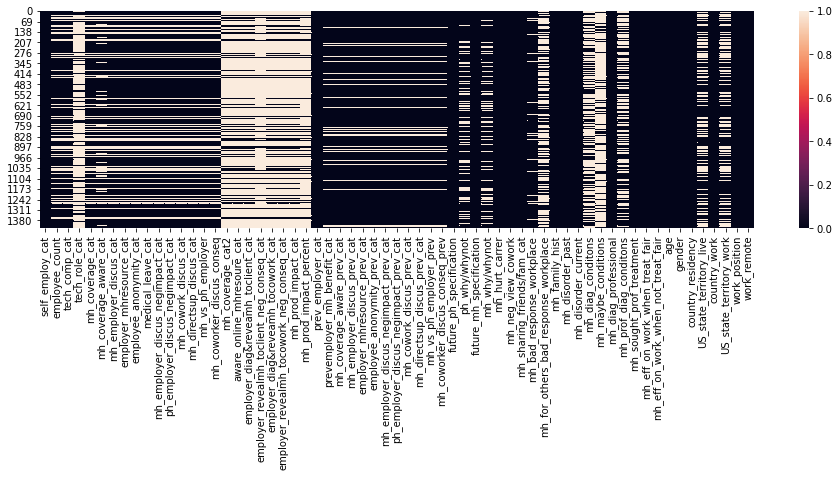

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (16,4))
sns.heatmap(data = survey.isna())

take a look at the number of missing values from each column

In [12]:
# check if more than half of observations have na values
# all cols have more than half observations w/o na values
# half_obs = 1443//2
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(survey.isna().sum())

self_employ_cat                                 0
employee_count                                287
tech_comp_cat                                 287
tech_role_cat                                1170
mh_coverage_cat                               287
mh_coverage_aware_cat                         420
mh_employer_discus_cat                        287
employer_mhresource_cat                       287
employee_anonymity_cat                        287
medical_leave_cat                             287
mh_employer_discus_negimpact_cat              287
ph_employer_discus_negimpact_cat              287
mh_cowork_discus_cat                          287
mh_directsup_discus_cat                       287
mh_vs_ph_employer                             287
mh_coworker_discus_conseq                     287
mh_coverage_cat2                             1146
aware_online_mhresoure_cat                   1146
employer_diag&reveamh_toclient_cat           1146
employer_revealmh_toclient_neg_conseq_cat    1289


drop the following columns with more than half observations missing

       'tech_role_cat', 'mh_coverage_cat2', 'aware_online_mhresoure_cat',
       'employer_diag&reveamh_toclient_cat',
       'employer_revealmh_toclient_neg_conseq_cat',
       'employer_diag&reveamh_tocowork_cat',
       'employer_revealmh_tocowork_neg_conseq_cat', 'mh_prod_impact_cat',
       'mh_prod_impact_percent', 'mh_for_others_bad_response_workplace',
       'mh_diag_conditons', 'mh_maybe_conditions', 'mh_prof_diag_conditons'
       
now we are left with 50 attributes

In [13]:
# survey has 1433 observations, drop columns with more than half of observations missing
more_than_half_na = (survey.isna().sum() / survey.shape[0] >= 0.5).tolist()

drop_cols = survey.columns[more_than_half_na]
print(drop_cols)
survey.drop(labels = drop_cols, axis = 1, inplace = True)
survey.shape

Index(['tech_role_cat', 'mh_coverage_cat2', 'aware_online_mhresoure_cat',
       'employer_diag&reveamh_toclient_cat',
       'employer_revealmh_toclient_neg_conseq_cat',
       'employer_diag&reveamh_tocowork_cat',
       'employer_revealmh_tocowork_neg_conseq_cat', 'mh_prod_impact_cat',
       'mh_prod_impact_percent', 'mh_for_others_bad_response_workplace',
       'mh_diag_conditons', 'mh_maybe_conditions', 'mh_prof_diag_conditons'],
      dtype='object')


(1433, 50)

here is the number of missing values in remaining columns

In [14]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(survey.isna().sum())

 Only age has numerical values

In [15]:
# employee_counts is categorical
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(survey['employee_count'])

there are 464 observations w/o any missing data

In [16]:
# drop a row if any of its column has missing values
drop_all_na = survey.dropna(how = 'any')

check to see if drop_all_na has no missing value at all

In [17]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(drop_all_na.isna().sum())

self_employ_cat                          0
employee_count                           0
tech_comp_cat                            0
mh_coverage_cat                          0
mh_coverage_aware_cat                    0
mh_employer_discus_cat                   0
employer_mhresource_cat                  0
employee_anonymity_cat                   0
medical_leave_cat                        0
mh_employer_discus_negimpact_cat         0
ph_employer_discus_negimpact_cat         0
mh_cowork_discus_cat                     0
mh_directsup_discus_cat                  0
mh_vs_ph_employer                        0
mh_coworker_discus_conseq                0
prev_employer_cat                        0
prevemployer_mh_benefit_cat              0
mh_coverage_aware_prev_cat               0
mh_employer_discus_prev_cat              0
employer_mhresource_prev_cat             0
employee_anonymity_prev_cat              0
mh_employer_discus_negimpact_prev_cat    0
ph_employer_discus_negimpact_prev_cat    0
mh_cowork_d

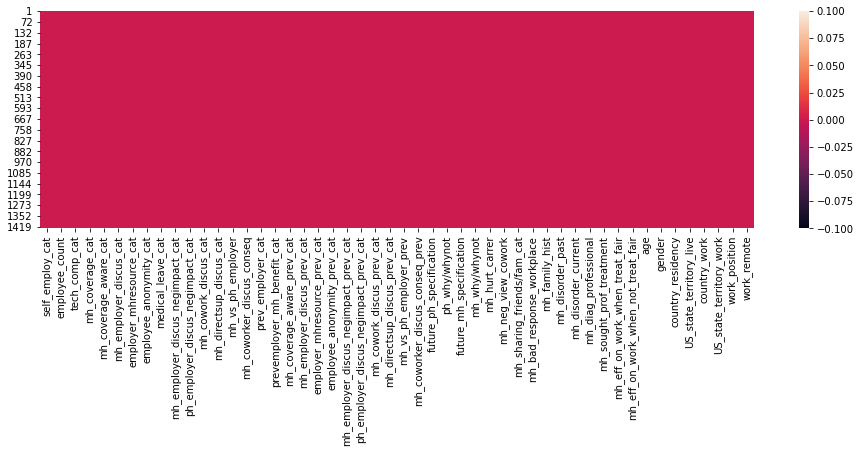

In [18]:
plt.figure(figsize = (16,4))
sns.heatmap(data = drop_all_na.isna())

# Is mental health issues a topic people can talk about more freely?


* Discussing with their employer:
> Employees tend to think that they can talk about mental health issues more freely with their current employer
than their previous ones without negative consequence

Note: took away answers that were not specific: 'I don't know', 'Maybe', 

In [19]:
# removed anwsers that was impartial
def remove_idk(neutral_str, count_list):
#     print(count_list)
    percent_list = []
    if neutral_str:
        count_list = count_list.drop(labels = neutral_str)
#     print(type(count_list))
    total = 0
    for count in np.nditer(count_list):
        total = total + count
#     print(total)
    for count in np.nditer(count_list):
        percent_list.append(count/total)
    return percent_list

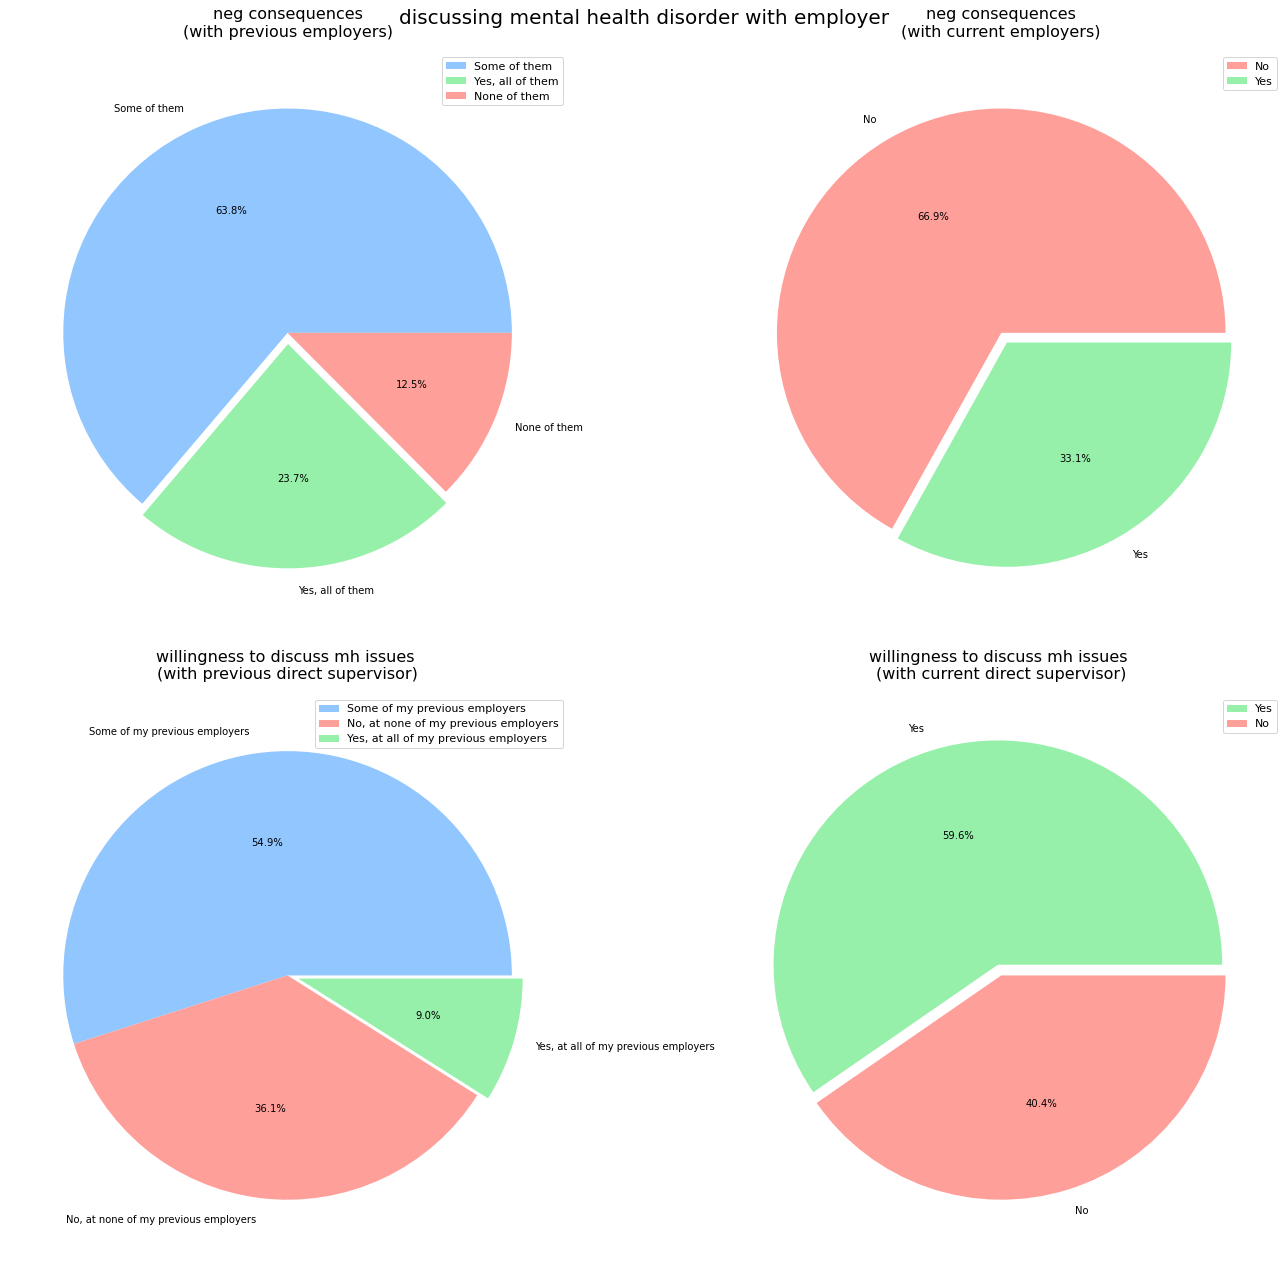

In [20]:
fig, ax = plt.subplots(figsize = (18,18), ncols = 2, nrows = 2)
# fig.suptitle('Do you think that discussing a mental health disorder with your current vs previous employer would have negative consequences?',fontsize=20)
fig.suptitle('discussing mental health disorder with employer',fontsize=20)

neutral = ''
colors = ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6']

neutral = 'I don\'t know'
labels = list(drop_all_na['mh_employer_discus_negimpact_prev_cat'].value_counts().index.drop(labels = neutral))
sizes = drop_all_na['mh_employer_discus_negimpact_prev_cat'].value_counts()
explode = [0, 0.05, 0]
sizes = remove_idk(neutral, sizes)
ax[0][0].pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors, explode = explode)
ax[0][0].set_title('neg consequences\n(with previous employers)',pad = 16, fontsize = 16)
ax[0][0].legend(loc='upper right')

neutral = 'Maybe'
labels_2 = list(drop_all_na['mh_employer_discus_negimpact_cat'].value_counts().index.drop(labels = neutral))
sizes_2 = remove_idk(neutral,drop_all_na['mh_employer_discus_negimpact_cat'].value_counts())
colors = ['#FF9F9A', '#97F0AA']
explode = [0, 0.05]
ax[0][1].pie(sizes_2, labels=labels_2, autopct='%1.1f%%',colors = colors, explode = explode)
ax[0][1].set_title('neg consequences\n(with current employers)',pad = 16, fontsize = 16)
ax[0][1].legend(loc='upper right')

neutral = 'I don\'t know'
labels_3 = list(drop_all_na['mh_directsup_discus_prev_cat'].value_counts().index.drop(labels = neutral))
sizes_3 = remove_idk(neutral, drop_all_na['mh_directsup_discus_prev_cat'].value_counts())
colors = ['#92C6FF', '#FF9F9A','#97F0AA']
explode = [0, 0, 0.05]
ax[1][0].pie(sizes_3, labels=labels_3, autopct='%1.1f%%',colors = colors, explode = explode)
ax[1][0].set_title('willingness to discuss mh issues \n(with previous direct supervisor)',pad = 16, fontsize = 16)
ax[1][0].legend(loc='upper right')

neutral = 'Maybe'
labels_4 = list(drop_all_na['mh_directsup_discus_cat'].value_counts().index.drop(labels = neutral))
sizes_4 = remove_idk(neutral, drop_all_na['mh_directsup_discus_cat'].value_counts())
colors = ['#97F0AA', '#FF9F9A']
explode = [0.05, 0]
ax[1][1].pie(sizes_4, labels=labels_4, autopct='%1.1f%%',colors = colors, explode = explode)
ax[1][1].set_title('willingness to discuss mh issues \n(with current direct supervisor)',pad = 16, fontsize = 16)
ax[1][1].legend(loc='upper right')

# from matplotlib change legend title / text
# plt.setp(ax[1][1].get_legend().get_title(), fontsize='32') # for legend title
plt.setp(ax[0][0].get_legend().get_texts(), fontsize='11') # for legend text
plt.setp(ax[0][1].get_legend().get_texts(), fontsize='11')
plt.setp(ax[1][0].get_legend().get_texts(), fontsize='11')
plt.setp(ax[1][1].get_legend().get_texts(), fontsize='11')

plt.tight_layout()
plt.show()

Would you feel comfortable discussing a mental health disorder with your coworkers?

* Discussing with their coworker:
> * More people believe that ther will not be a negative consequence discussing a mental disorder with their employer
> * Yet there are a good amount of people who are on the fence

take a look at related survey questions:
1. Would you feel comfortable discussing a mental health disorder with your coworkers?
> variable name: mh_cowork_discus_cat
2. Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
> variable name: mh_coworker_discus_conseq

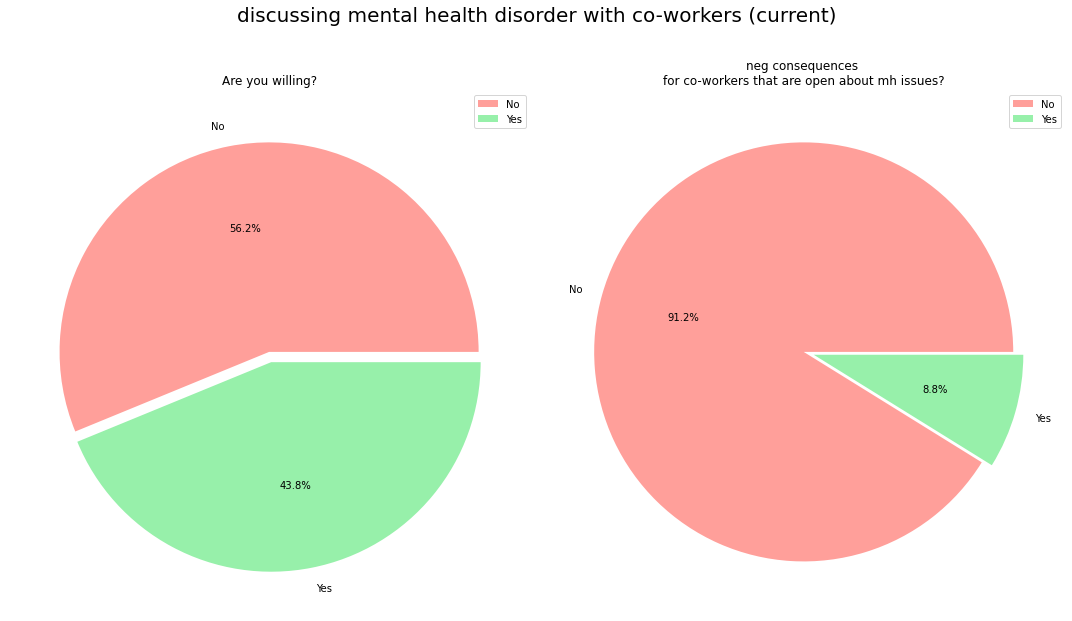

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15,10), ncols = 2, nrows =1)
fig.suptitle ('discussing mental health disorder with co-workers (current)', fontsize=20)
neutral = ''
colors = ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6']

neutral = 'Maybe'
labels = list(drop_all_na['mh_cowork_discus_cat'].value_counts().index.drop(labels = neutral))
sizes = drop_all_na['mh_cowork_discus_cat'].value_counts()
sizes = remove_idk(neutral, sizes)
explode = [0, 0.05]
colors = ['#FF9F9A', '#97F0AA',]
ax[0].pie(sizes, labels = labels, autopct = '%1.1f%%', colors = colors, explode = explode)
ax[0].set_title ('Are you willing?')
ax[0].legend(loc = 'upper right')

labels_2 = list(drop_all_na['mh_coworker_discus_conseq'].value_counts().index)
sizes_2 = drop_all_na['mh_coworker_discus_conseq'].value_counts()
explode = [0, 0.05]
ax[1].pie(sizes_2, labels = labels_2, autopct = '%1.1f%%', colors = colors, explode = explode)
# * Have you heard of or observed negative consequences for co-workers that are open about mh issues?
ax[1].set_title ('neg consequences \nfor co-workers that are open about mh issues?')
ax[1].legend(loc = 'upper right')

plt.tight_layout()
plt.show()

Current workplace
* Most people think that there are no observed negative consequences for co-workers who openly talk about mental health issues.
* Yet over half of the employees are not comfortable with talking about mental health issues in workplace.
* Employees might want to keep dicussions professional in workplace and choose to not talk about something private like mental health issues.

More questions
3. Would you have been willing to discuss a mental health issue with your previous co-workers?
> variable name: mh_cowork_discus_prev_cat
4. Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
> variable name: mh_coworker_discus_conseq_prev
5. Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
> variable name: mh_neg_view_cowork

Some of my previous employers           267
No, at none of my previous employers    163
Yes, at all of my previous employers     34
Name: mh_cowork_discus_prev_cat, dtype: int64

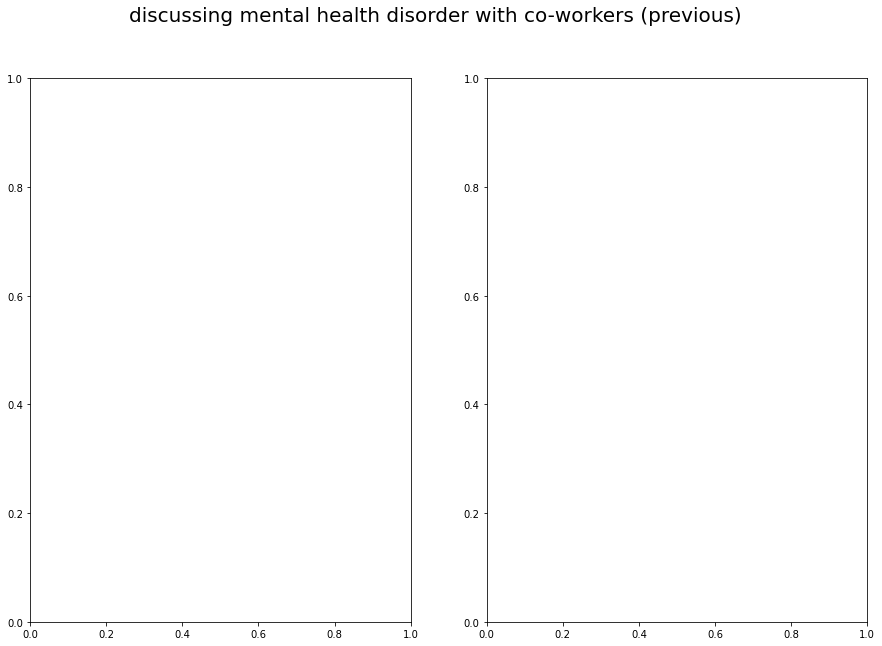

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (15,10), ncols = 2, nrows =1)
fig.suptitle ('discussing mental health disorder with co-workers (previous)', fontsize=20)
neutral = ''
colors = ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6']


# labels = list(drop_all_na['mh_coworker_discus_conseq_prev'].value_counts().index)
# sizes = drop_all_na['mh_coworker_discus_conseq_prev'].value_counts()

# explode = [0, 0, 0.05]
# colors = ['#FF9F9A', '#92C6FF', '#97F0AA']
# ax[1].pie(sizes, labels=labels, autopct='%1.1f%%',colors = colors, explode = explode)
# ax[1].set_title('neg consequences',pad = 16, fontsize = 16)
# ax[1].legend(loc='upper right')


labels_2 = list(drop_all_na['mh_cowork_discus_prev_cat'].value_counts().index)
sizes_2 = drop_all_na['mh_cowork_discus_prev_cat'].value_counts()
drop_all_na['mh_cowork_discus_prev_cat']
# colors = ['#92C6FF', '#FF9F9A','#97F0AA']
# explode = [0, 0, 0.05]
# ax[0].pie(sizes_2, labels=labels_2, autopct='%1.1f%%',colors = colors, explode = explode)
# ax[0].set_title('Are you willing?',pad = 16, fontsize = 16)
# ax[0].legend(loc='upper right')
# plt.tight_layout()
# plt.show()

Previous workplace
* 

* Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
> variable name: mh_neg_view_cowork

In [23]:
drop_all_na['mh_neg_view_cowork'].value_counts()

Maybe                           193
Yes, I think they would         124
No, I don't think they would    112
No, they do not                  22
Yes, they do                     13
Name: mh_neg_view_cowork, dtype: int64

In [24]:
# mh_neg_view_cowork

colors = ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6']
o = ['Yes, they do','Yes, I think they would','Maybe','No, I don\'t think they would','No, they do not']
g2 = sns.countplot(x="mh_neg_view_cowork", data=drop_all_na, palette = colors, order = o, ti)
g2.set_xticklabels(g2.get_xticklabels(), rotation = 30, ha = "right")
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
plt.tight_layout()
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-24-0dc304f5663c>, line 5)

In [ ]:
x = drop_all_na['mh_coworker_discus_conseq'].value_counts()
x

In [ ]:
y = drop_all_na['mh_cowork_discus_cat'].value_counts()
y

In [ ]:
# drop_all_na['mh_coworker_discus_conseq'].index
g1 = sns.barplot(x = drop_all_na['mh_coworker_discus_conseq'].index,
                 y = drop_all_na['mh_cowork_discus_cat'],
             data = drop_all_na, capsize=.2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')

In [ ]:
g2 = sns.countplot(x='mh_employer_discus_negimpact_cat',
                  hue ='employee_count', data = drop_all_na, order=['Yes', 'No', 'Maybe'],
                   hue_order = ['1-5', '6-25', '26-100', '100-500', '500-1000','>1000'])
g2.set_xlabel('Do you think that discussing a mental health disorder with your employer would have negative consequences?')